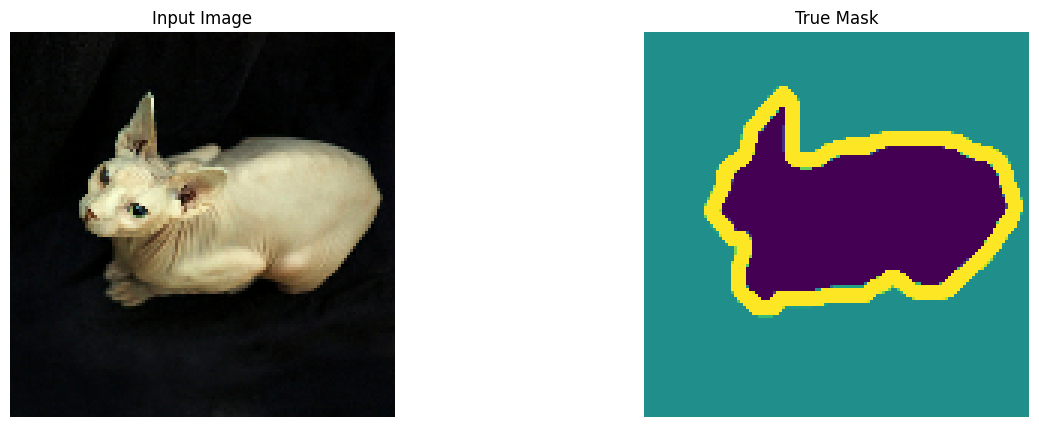

In [ ]:
!pip install -U tensorflow-datasets

import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info = tfds.load('oxford_iiit_pet', with_info=True, download=True, try_gcs=False)
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
    return normalize(input_image, input_mask)
train = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

import matplotlib.pyplot as plt

def display(display_list):
    plt.figure(figsize=(15, 5))
    title = ['Input Image', 'True Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])

